<a href="https://colab.research.google.com/github/kad19/2181_Kosarev_comp_alg/blob/main/02prac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

8 +=, -+, *=
x^2+2x^1+1
x^1+1
x^2+3x^1+2
x^2+2x^1+1
x^3+3x^2+3x^1+1

9 evalf
4

11 show


<IPython.core.display.Math object>


12 diff
2x^1-2



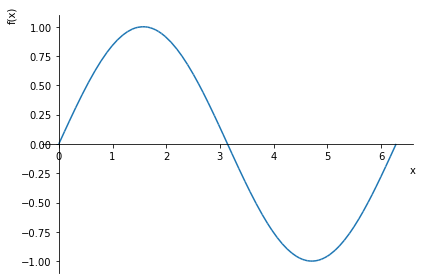

In [65]:
from IPython.display import display, Math
import matplotlib.pyplot as plt


class Polynomial:
  def __init__(self, *coefs):
    self.coefs = coefs

  def __str__(self):
    if len(self.coefs) == 1:
      return str(self.coefs[0])
    else:
      first = True
      poly_str = ''
      max_pwr = len(self.coefs) - 1
      for coef in reversed(self.coefs):
        if first:
          if abs(coef) == 1:
            if coef == 0:
              max_pwr -= 1
              continue
            if coef > 0:
              poly_str += f"x^{max_pwr}"
            if coef < 0:
              poly_str += f"x^{max_pwr}"
          else:
            if coef == 0:
              max_pwr -= 1
              continue
            if coef > 0:
              poly_str += f"{coef}x^{max_pwr}"
            if coef < 0:
              poly_str += f"{coef}x^{max_pwr}"
          max_pwr -= 1
          first = False
        elif max_pwr == 0:
          if coef == 0:
            max_pwr -= 1
            continue
          if coef > 0:
            poly_str += f"+{coef}"
          if coef < 0:
            poly_str += f"{coef}"
          max_pwr -= 1
        else:
          if abs(coef) == 1:
            if coef == 0:
              max_pwr -= 1
              continue
            if coef > 0:
              poly_str += f"+x^{max_pwr}"
            if coef < 0:
              poly_str += f"x^{max_pwr}"
          else:
            if coef == 0:
              max_pwr -= 1
              continue
            if coef > 0:
              poly_str += f"+{coef}x^{max_pwr}"
            if coef < 0:
              poly_str += f"{coef}x^{max_pwr}"
          max_pwr -= 1
        
      return poly_str

  def __add__(self, poly2):
    poly_coefs = self.coefs[::-1]
    poly2_coefs = poly2.coefs[::-1]
    new_coefs = []

    if len(poly_coefs) < len(poly2_coefs):
      poly_coefs, poly2_coefs = poly2_coefs, poly_coefs
    poly2_coefs = [0] * (len(poly_coefs) - len(poly2_coefs)) + list(poly2_coefs)

    for i in range(len(poly_coefs)):
      new_coefs.append(poly_coefs[i] + poly2_coefs[i])

    new_coefs = new_coefs[::-1]
    return Polynomial(*new_coefs)

  def __sub__(self, poly2):
    poly_coefs = self.coefs[::-1]
    poly2_coefs = poly2.coefs[::-1]
    new_coefs = []

    if len(poly_coefs) > len(poly2_coefs):
      poly2_coefs = [0] * (len(poly_coefs) - len(poly2_coefs)) + list(poly2_coefs)
    else:
      poly_coefs = [0] * (len(poly2_coefs) - len(poly_coefs)) + list(poly_coefs)

    for i in range(len(poly_coefs)):
      new_coefs.append(poly_coefs[i] - poly2_coefs[i])

    new_coefs = new_coefs[::-1]
    return Polynomial(*new_coefs)

  def __mul__(self, poly2):
    poly_coefs = self.coefs
    poly2_coefs = poly2.coefs
    new_coefs = [0] * (len(poly_coefs) + len(poly2_coefs))
    
    for i in range(len(poly_coefs)):
      for j in range(len(poly2_coefs)):
        new_coefs[i+j] += poly_coefs[i] * poly2_coefs[j]

    return Polynomial(*new_coefs)

  def __truediv__(self, poly2):
    poly_coefs = list(self.coefs)[::-1] # делимое, потом остаток
    poly2_coefs = list(poly2.coefs)[::-1] # делитель
    new_coefs = [0] * len(poly_coefs) # разность

    while (len(poly_coefs) >= len(poly2_coefs)):
      new_coefs[len(poly_coefs) - len(poly2_coefs)] = poly_coefs[0]
      temp_del_coefs = [poly_coefs[0] * x for x in poly2_coefs] # вычитаемое

      # вычитаю
      for i in range(len(temp_del_coefs)):
        poly_coefs[i] -= temp_del_coefs[i]

      # обрезаю
      while poly_coefs[0] == 0:
        poly_coefs = poly_coefs[1:]

    return Polynomial(*new_coefs), Polynomial(*poly_coefs[::-1])

  def __pow__(self, n):
    new_poly = Polynomial(*self.coefs)
    new_poly2 = Polynomial(*self.coefs)
    for i in range(n-1):
      new_poly = new_poly * new_poly2
    return new_poly

  # 8 +=, -=, *=
  def __radd__(self, poly2):
    return self + poly2
    
  def __rsub__(self, poly2):
    return self - poly2

  def __rmul__(self, poly2):
    return self * poly2

  # 9 значение в заданной точке evalf

  def evalf(self, x):
    f = 0
    for i in range(len(self.coefs)):
      f += self.coefs[i] * x ** i

    return f

  # 10 toLatex
  # То же самое, что делает в данном случае __str__, нет?

  def toLatex(self):
    return self.__str__()

  # 11 вывод формулы на печать

  def show(self):
    display(Math(self.toLatex()))

  # 12

  def diff(self):
    self.coefs = list(self.coefs)
    new_coefs = [0] * (len(self.coefs) - 1)
    for i in range(len(new_coefs)):
      new_coefs[i] = self.coefs[i+1] * (i + 1)

    return Polynomial(*new_coefs)

'''
# ? умножение

poly2 = Polynomial(1 ,2, 1)
print(poly2)
poly3 = Polynomial(1, 1)
print(poly3)
poly4 = poly2 * poly3
print(poly4)
print()

# 6 деление
print('6 truediv')
poly = Polynomial(1, 2, 3)
print(poly)
poly2 = Polynomial(2, 1)
print(poly2)
poly3, poly4 = poly / poly2
print(poly3)
print(poly4)
print()

# 7 возведение в натуральную степень

print('7 pow')
poly = Polynomial(1, 1)
print(poly)
poly = poly ** 3
print(poly)
print()
'''
# 8 +=, -=, *=

print('8 +=, -+, *=')
poly2 = Polynomial(1 ,2, 1)
print(poly2)
poly3 = Polynomial(1, 1)
print(poly3)
poly2 += poly3
print(poly2)
poly2 -= poly3
print(poly2)
poly2 *= poly3
print(poly2)
print()

# 9 значение в заданной точке

print('9 evalf')
poly3 = Polynomial(1, -2, 1)
print(poly3.evalf(3))
print()

# 11

print('11 show')
poly3.show()
print()

#12

print('12 diff')
poly4 = poly3.diff()
print(poly4)
print()

# 13

'''
y = Polynomial(1, 1)
y = x * 2
plt.plot(y, 'x', -20, 20, 500)
'''

from sympy import *
# %matplotlib inline
x = symbols('x')
p = plot(sin(x),(x,0, 2*pi))